In [2]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [3]:
mathData = pd.read_csv('student/student-mat.csv', sep=';')

In [4]:
mathData.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


# Data Processing

In [5]:

#unique classes/categories in every column 

print(f'school: {mathData.school.unique()}')
print(f'sex: {mathData.sex.unique()}')
print(f'address: {mathData.address.unique()}')
print(f'Mjob: {mathData.Mjob.unique()}')
print(f'Fjob: {mathData.Fjob.unique()}')
print(f'higher: {mathData.higher.unique()}')

school: ['GP' 'MS']
sex: ['F' 'M']
address: ['U' 'R']
Mjob: ['at_home' 'health' 'other' 'services' 'teacher']
Fjob: ['teacher' 'other' 'services' 'health' 'at_home']
higher: ['yes' 'no']


In [6]:
#convert the categories into numbers 

#binary valued

mathData['school'] = mathData['school'].apply({'GP':1, 'MS':0}.get)
mathData['sex'] = mathData['sex'].apply({'F':1, 'M':0}.get)
mathData['address'] = mathData['address'].apply({'U':1, 'R':0}.get)
mathData['higher'] = mathData['higher'].apply({'yes':1, 'no':0}.get)


#multi-valued
mathData['Mjob'] = mathData['Mjob'].apply({'at_home':1, 'health':2, 'other':3, 'services':4, 'teacher':5}.get)
mathData['Fjob'] = mathData['Fjob'].apply({'at_home':1, 'health':2, 'other':3, 'services':4, 'teacher':5}.get)

mathData.head(15)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,18,1,GT3,A,4,4,1,5,...,4,3,4,1,1,3,6,5,6,6
1,1,1,17,1,GT3,T,1,1,1,3,...,5,3,3,1,1,3,4,5,5,6
2,1,1,15,1,LE3,T,1,1,1,3,...,4,3,2,2,3,3,10,7,8,10
3,1,1,15,1,GT3,T,4,2,2,4,...,3,2,2,1,1,5,2,15,14,15
4,1,1,16,1,GT3,T,3,3,3,3,...,4,3,2,1,2,5,4,6,10,10
5,1,0,16,1,LE3,T,4,3,4,3,...,5,4,2,1,2,5,10,15,15,15
6,1,0,16,1,LE3,T,2,2,3,3,...,4,4,4,1,1,3,0,12,12,11
7,1,1,17,1,GT3,A,4,4,3,5,...,4,1,4,1,1,1,6,6,5,6
8,1,0,15,1,LE3,A,3,2,4,3,...,4,2,2,1,1,1,0,16,18,19
9,1,0,15,1,GT3,T,3,4,3,3,...,5,5,1,1,1,5,0,14,15,15


In [7]:
#consider the below columns from the DataFrame

mathData = mathData[['school', 'sex', 'address', 'Mjob', 'Fjob', 'higher', 'freetime', 
                     'studytime', 'absences', 'G1', 'G2', 'G3']]

In [8]:
# Head shows the 1st 10 values
mathData.head()

,school,sex,address,Mjob,Fjob,higher,freetime,studytime,absences,G1,G2,G3
0,1,1,1,1,5,1,3,2,6,5,6,6
1,1,1,1,1,3,1,3,2,4,5,5,6
2,1,1,1,1,3,1,3,2,10,7,8,10
3,1,1,1,2,4,1,2,3,2,15,14,15
4,1,1,1,3,3,1,3,2,4,6,10,10


In [9]:
mathData.to_csv('student/cleanedMathData.csv')

In [10]:
ls

 Volume in drive C is Acer
 Volume Serial Number is 747B-5510

 Directory of C:\Users\mgrac\Documents\Jupyter Notebook\GirlScript Foundation ML course

04-06-2021  20:15    <DIR>          .
04-06-2021  20:15    <DIR>          ..
30-05-2021  19:32    <DIR>          .ipynb_checkpoints
24-05-2021  11:27         6,504,424 01_Perceptron_Training.ipynb
04-06-2021  20:15           691,142 Explanatory Data Analysis.ipynb
30-05-2021  19:42    <DIR>          student
               2 File(s)      7,195,566 bytes
               4 Dir(s)  47,215,345,664 bytes free


# Data Visualization

['#c6690c', '#f9b158', '#fce6c8', '#e1e2ee', '#aba3cd', '#664697']

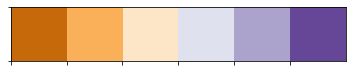

In [11]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) #Purple to Orange colors
pal = sns.color_palette('PuOr', 6) #print 6 color shades from Purple to Orange
pal.as_hex() #set hex code values for colors

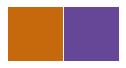

In [12]:
import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [13]:
mathData.columns #columns in the dataframe

Index(['school', 'sex', 'address', 'Mjob', 'Fjob', 'higher', 'freetime',
       'studytime', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

C:\Users\mgrac\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\mgrac\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\mgrac\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


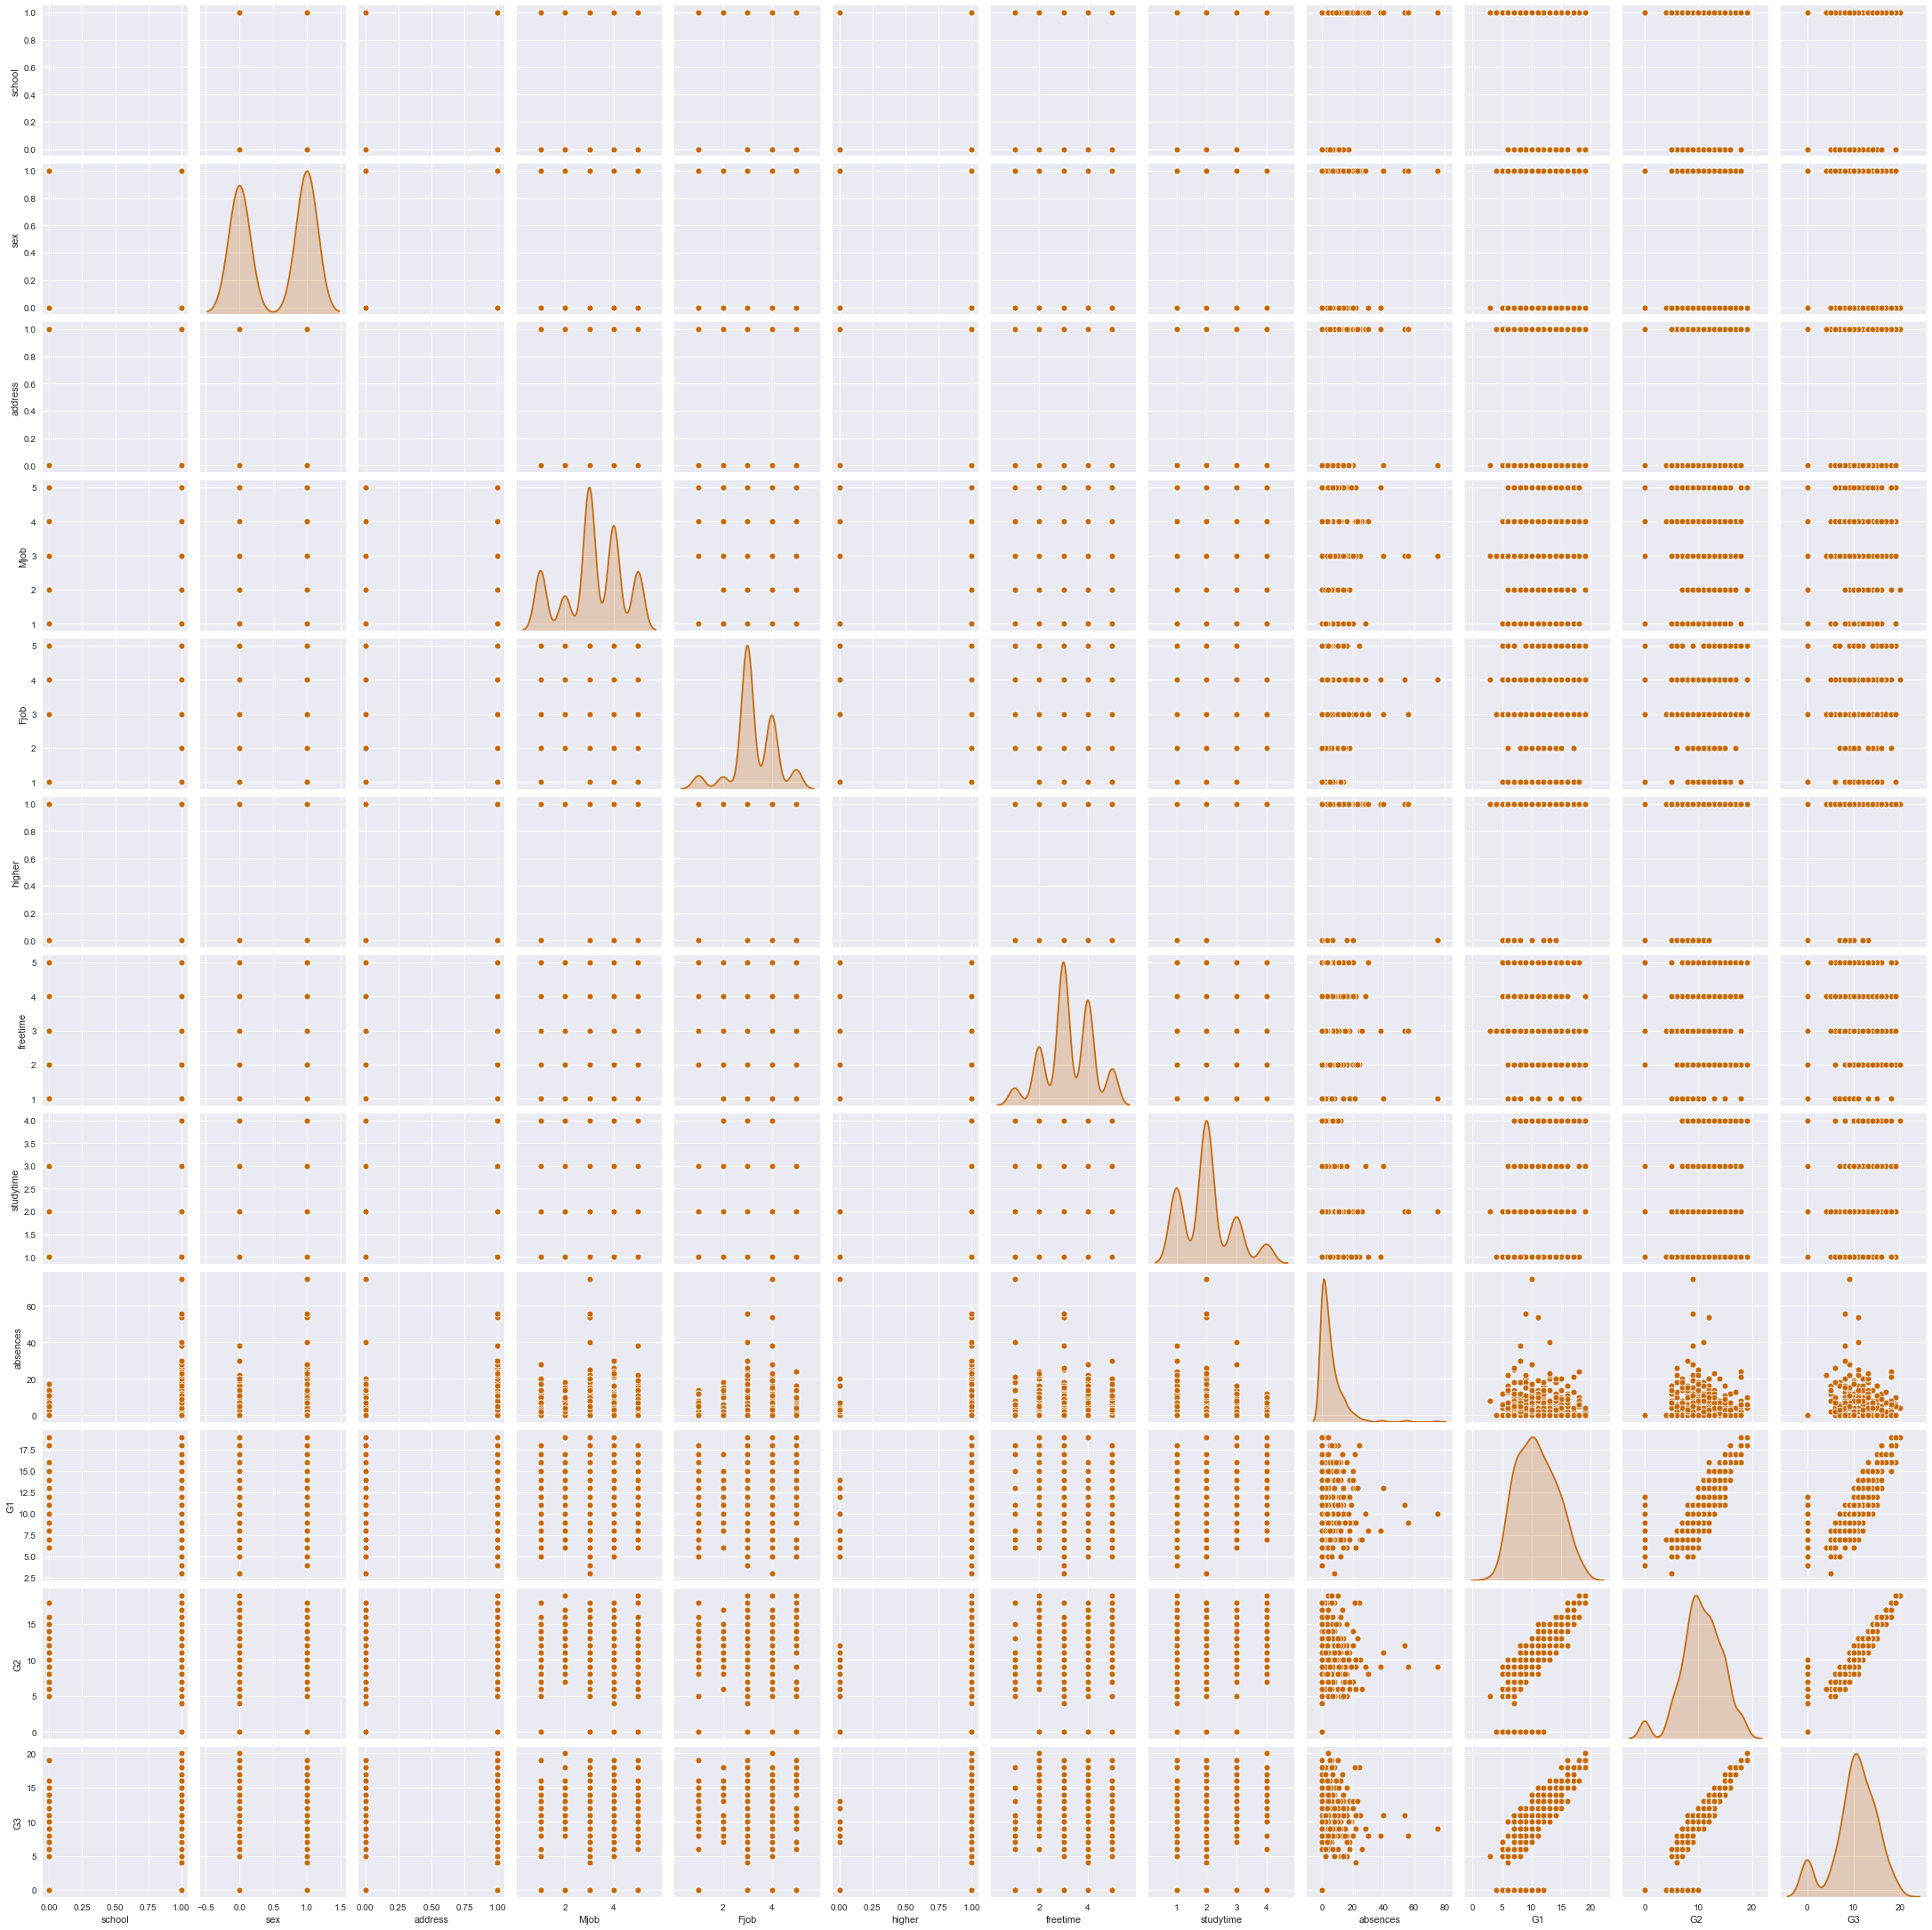

In [14]:
#pairplot for all the values

sns.pairplot(mathData,
             x_vars = ['school', 'sex', 'address', 'Mjob', 'Fjob', 'higher', 'freetime',
       'studytime', 'absences', 'G1', 'G2', 'G3'],
             y_vars = ['school', 'sex', 'address', 'Mjob', 'Fjob', 'higher', 'freetime',
       'studytime', 'absences', 'G1', 'G2', 'G3'],
       diag_kind='kde'
             )

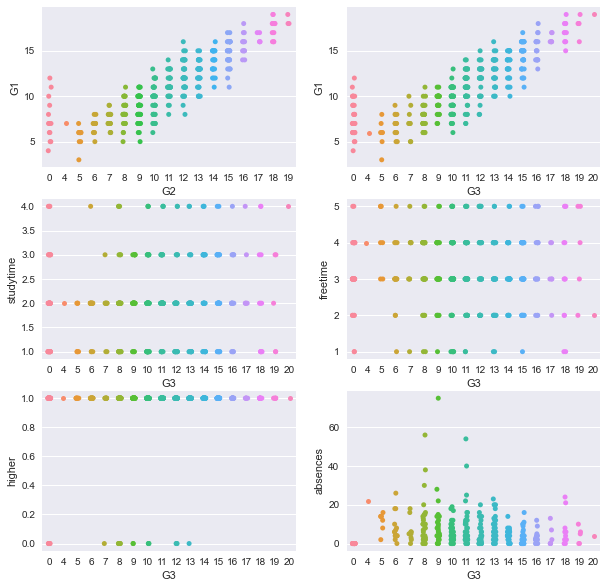

In [15]:
# stripplots plotted as subplots on one main plot with the ax parameter

fig, axarr = plt.subplots(3,2, figsize=(10,10))

# 3, 2 --> 3 rows and 2 columns 
# figsize increases the size of the graph

sns.stripplot(y='G1', x='G2', data=mathData, hue=None, ax=axarr[0][0])
sns.stripplot(y='G1', x='G3', data=mathData, hue=None, ax=axarr[0][1])
sns.stripplot(y='studytime', x='G3', data=mathData, hue=None, ax=axarr[1][0])
sns.stripplot(y='freetime', x='G3', data=mathData, hue=None,  ax=axarr[1][1])
sns.stripplot(y='higher', x='G3', data=mathData, hue=None, ax=axarr[2][0])
sns.stripplot(y='absences', x='G3', data=mathData, hue=None, ax=axarr[2][1])

C:\Users\mgrac\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\mgrac\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\mgrac\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\mgrac\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\mgrac\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\mgrac\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Defa

C:\Users\mgrac\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\mgrac\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\mgrac\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\mgrac\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\mgrac\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\mgrac\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data

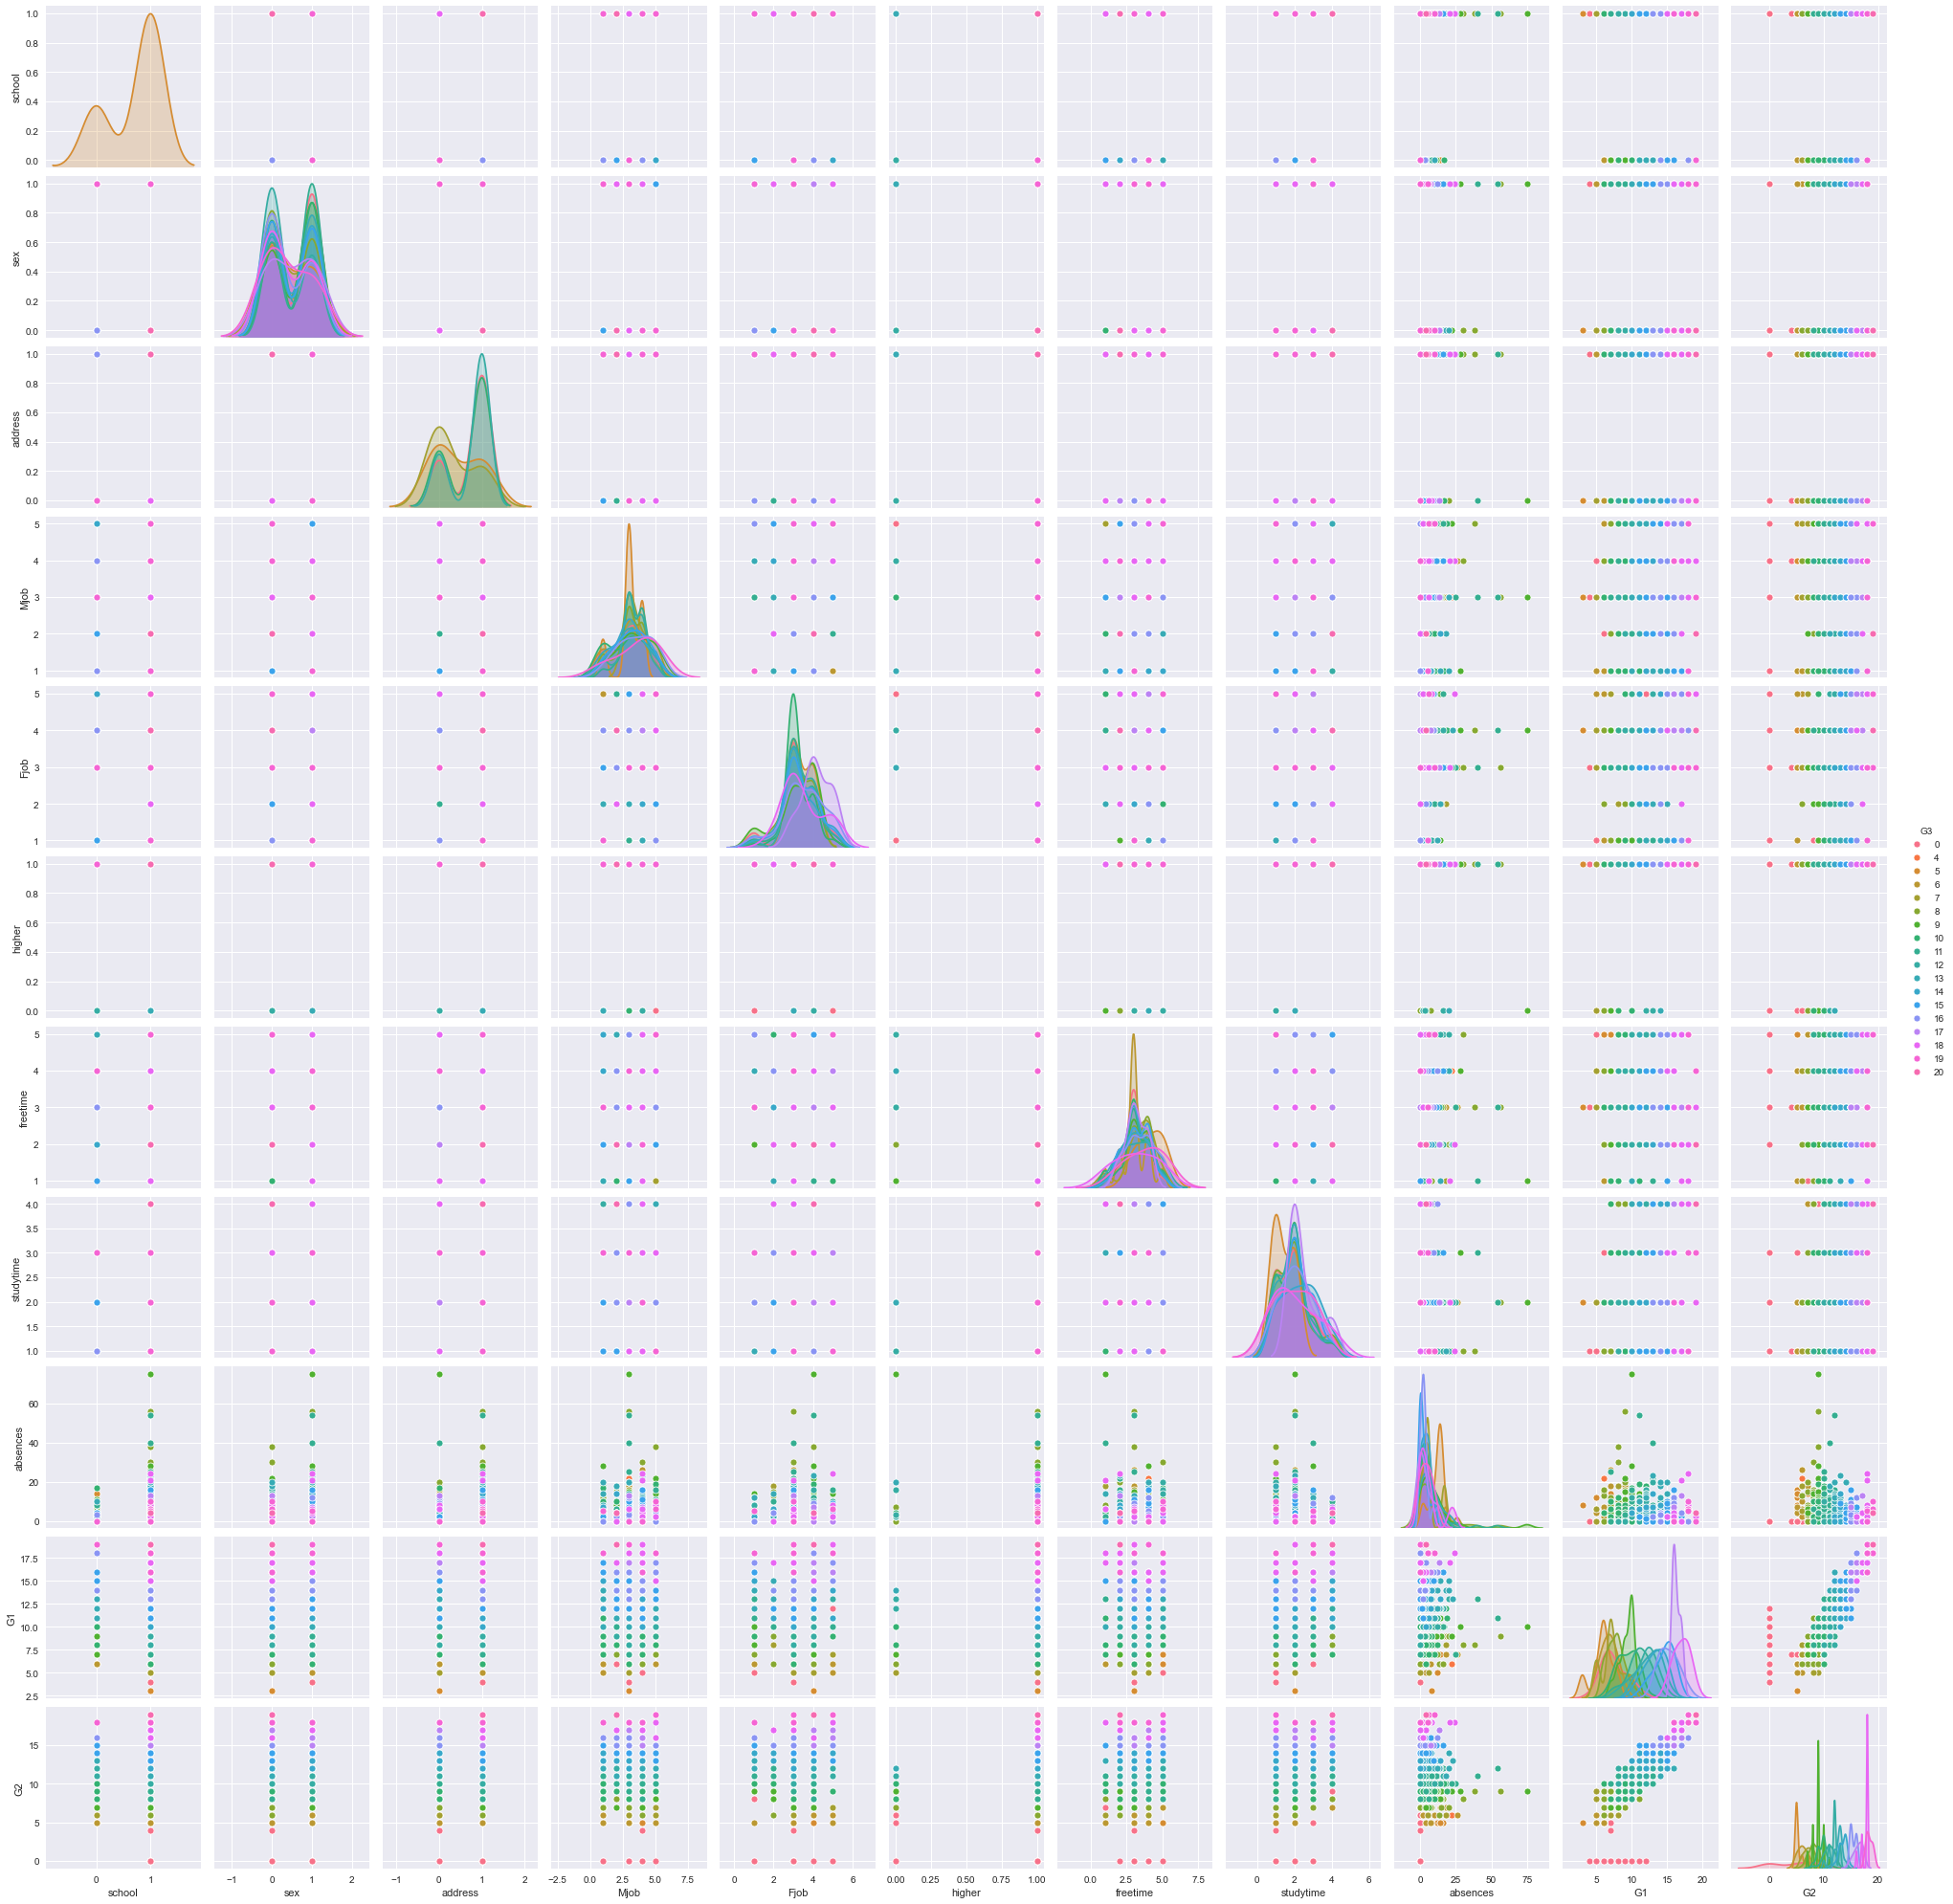

In [16]:
#pairplot for all the values

sns.pairplot(mathData,
             x_vars = ['school', 'sex', 'address', 'Mjob', 'Fjob', 'higher', 'freetime',
       'studytime', 'absences', 'G1', 'G2'],
             y_vars = ['school', 'sex', 'address', 'Mjob', 'Fjob', 'higher', 'freetime',
       'studytime', 'absences', 'G1', 'G2' ],
       diag_kind='kde', hue='G3'
             )

# Data Split

In [17]:
#80-20 train-test percent split

trainDataset = mathData.sample(frac=0.8, random_state=0) 
testDataset = mathData.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

     school  sex  address  Mjob  Fjob  higher  freetime  studytime  absences  \
329       1    1        1     5     5       1         3          3         4   
318       1    1        0     1     4       1         3          3         0   
317       1    1        1     3     3       1         3          3         9   
65        1    1        1     5     4       1         4          2         2   
59        1    1        1     4     3       1         2          2         2   

     G1  G2  G3  
329  14  14  14  
318  11  11  10  
317   9  10   9  
65   16  15  15  
59   15  16  16  
    school  sex  address  Mjob  Fjob  higher  freetime  studytime  absences  \
9        1    0        1     3     3       1         5          2         0   
25       1    1        1     4     4       1         2          1        14   
28       1    0        1     4     3       1         3          2         4   
31       1    0        1     4     4       1         3          2         0   
32       1    0 

In [18]:
print(trainDataset.shape)
print(testDataset.shape)

(316, 12)
(79, 12)


In [19]:
#copy the trainDataset dataframe for getting the features

trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     school  sex  address  Mjob  Fjob  higher  freetime  studytime  absences  \
329       1    1        1     5     5       1         3          3         4   
318       1    1        0     1     4       1         3          3         0   
317       1    1        1     3     3       1         3          3         9   
65        1    1        1     5     4       1         4          2         2   
59        1    1        1     4     3       1         2          2         2   

     G1  G2  G3  
329  14  14  14  
318  11  11  10  
317   9  10   9  
65   16  15  15  
59   15  16  16  
    school  sex  address  Mjob  Fjob  higher  freetime  studytime  absences  \
9        1    0        1     3     3       1         5          2         0   
25       1    1        1     4     4       1         2          1        14   
28       1    0        1     4     3       1         3          2         4   
31       1    0        1     4     4       1         3          2         0   
32       1    0 

In [20]:
#removing the G3 column and saving it into the labels variable

trainLabels = trainFeatures.pop('G3')
testLabels = testFeatures.pop('G3')

print(trainLabels.head())
print(testLabels.head())

329    14
318    10
317     9
65     15
59     16
Name: G3, dtype: int64
9     15
25     8
28    11
31    17
32    16
Name: G3, dtype: int64


In [21]:
print(trainFeatures.head())
print(testFeatures.head())

     school  sex  address  Mjob  Fjob  higher  freetime  studytime  absences  \
329       1    1        1     5     5       1         3          3         4   
318       1    1        0     1     4       1         3          3         0   
317       1    1        1     3     3       1         3          3         9   
65        1    1        1     5     4       1         4          2         2   
59        1    1        1     4     3       1         2          2         2   

     G1  G2  
329  14  14  
318  11  11  
317   9  10  
65   16  15  
59   15  16  
    school  sex  address  Mjob  Fjob  higher  freetime  studytime  absences  \
9        1    0        1     3     3       1         5          2         0   
25       1    1        1     4     4       1         2          1        14   
28       1    0        1     4     3       1         3          2         4   
31       1    0        1     4     4       1         3          2         0   
32       1    0        0     5     1    

In [22]:
print(testFeatures.shape)

(79, 11)
